# Investigate results of fitting procedure

In [1]:
import sys
sys.path.append("../python/")
#sys.path.append("../python/cluster/")


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
#import bokeh.palettes
import _corner
import imp
imp.reload(_corner)
from _corner import corner
from scipy.stats import gaussian_kde, binned_statistic
import pickle
from matplotlib.offsetbox import AnchoredText
from astropy.constants import R_jup, M_jup, M_sun, L_sun
from scipy.interpolate import interp1d, interp2d
from utils import temperature, heat, temperature_withDM
from scipy.interpolate import griddata
import matplotlib.colors as colors
import utils_plots
imp.reload(utils_plots)
#from utils_plots import plot_FSE_grid_f_gamma_ex1, plot_1Dposterior_ex1, plot_FSE_grid_f_gamma_ex2, plot_1Dposterior_ex1_f, plot_1Dposterior_ex1_gamma
from utils import gNFW_rho
import pickle

import imp
import utils_plots
imp.reload(utils_plots)
from utils_plots import grid_FSE, grid_FSE_all, grid_coverage_all

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':12})
#rc('text', usetex=True)

**Study the effect of samples discreteness in likelihood computation**

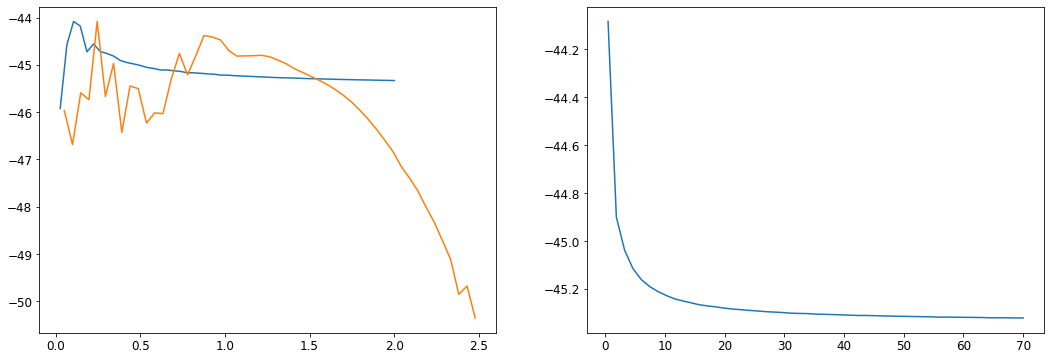

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]

ax[0].plot(x, y)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]

ax[0].plot(x, y)

x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]

ax[1].plot(x, y)

## Study the effect of the priors

**Uniform priors but gamma only up to 2**

0.010041561828150844 69.99769141296726    -10.151324188438025 1.0
0.0012168436249384573 1.999996080433541    0.429599938988531 1.0
0.01000023808390152 0.8488012664201676    -19.88974761659489 1.0


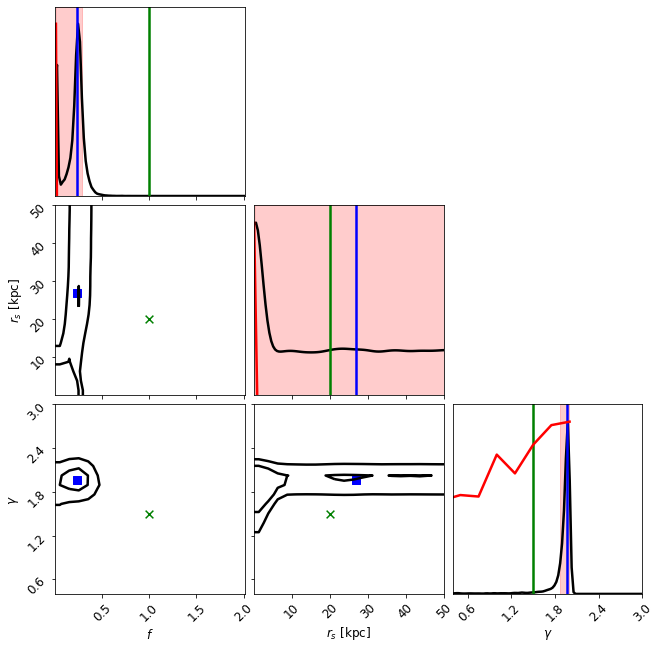

In [109]:
nBDs     = 1000 ; sigma= 0.3
f        = 1.; gamma = 1.5; rs = 20.
nwalkers = 50; steps = 4000

filepath = ("/home/mariacst/exoplanets/running/checks/")
_file    = open(filepath + ("like_N%i_sigma%.1f_f1.0gamma%.1frs%.1f_nwalkers%i_steps%i" 
                            %(nBDs, sigma, gamma, rs, nwalkers, steps)), "rb") 
like     = pickle.load(_file)
_file    = open(filepath + ("posterior_N%i_sigma%.1f_f1.0gamma%.1frs%.1f_nwalkers%i_steps%i" 
                            %(nBDs, sigma, gamma, rs, nwalkers, steps)), "rb") 
samples  = pickle.load(_file)
smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",
                   range=[(0.001, 2.01), (0., 50.), (0.4, 3.)])
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 0]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 2].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 0], 16), np.percentile(samples[:, 0], 84), color="red", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="red", alpha=0.2)
axes[2, 2].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="red", alpha=0.2)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

bin_n=8
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

#fig.savefig("fixedT100K_posterior_nBDs100_sigma0.3_gamma1.5_rs20.pdf", bbox_inches="tight")

**Uniform priors - standard case**

0.013944677081084933 69.99612116926369    0.9706455697606202 1.0
0.7619874765387677 2.9999468513201073    -8.022127187391362 1.0
0.010001752611724812 1.9976880204743042    -5.500321077305813 1.0


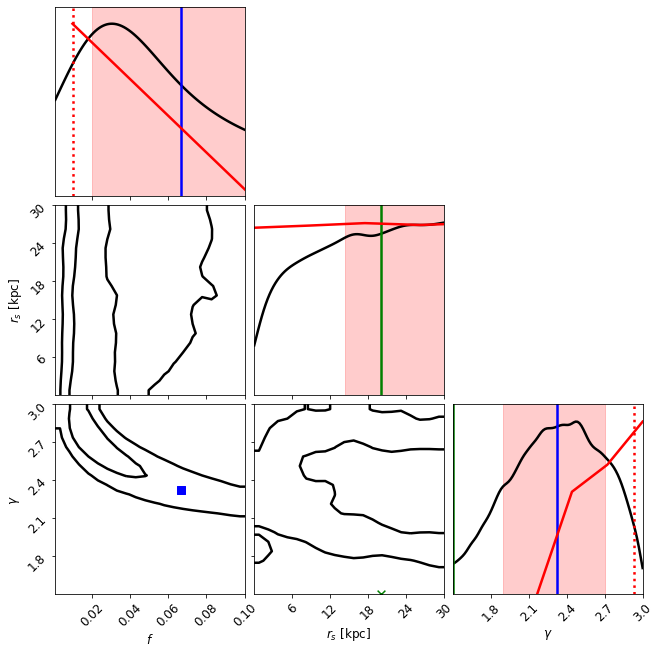

In [35]:
nBDs     = 100 ; sigma= 0.3
f        = 1.; gamma    = 1.5; rs = 20.

filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/check/N100sigma0.3/")
_file    = open(filepath + ("like_checkT_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv31" %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/check/N100sigma0.3/")
_file    = open(filepath + ("posterior_checkT_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv31" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)
smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",
                   range=[(0.001, 0.1), (0., 30.), (1.5, 3.)])
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 0]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 2].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 0], 16), np.percentile(samples[:, 0], 84), color="red", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="red", alpha=0.2)
axes[2, 2].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="red", alpha=0.2)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

bin_n=8
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

0.029616035049505385 69.99791928903073    0.8928534655125873 1.0
1.5489170474165623 2.9995995194680196    -21.027082994048044 1.0
0.010000205691290507 0.9278851338477809    -24.360137372069175 1.0


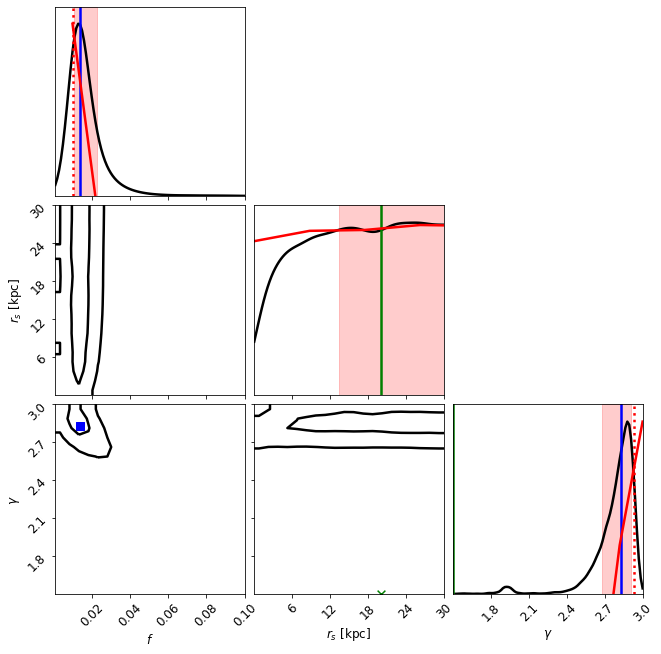

In [27]:
nBDs     = 1000 ; sigma= 0.3
f        = 1.; gamma    = 1.5; rs = 20.
nwalkers=50; steps=4000

filepath = ("/home/mariacst/exoplanets/running/checks/results/")
_file    = open(filepath + ("like_N%i_sigma%.1f_f1.0gamma%.1frs%.1f_nwalkers%i_steps%i" 
                            %(nBDs, sigma, gamma, rs, nwalkers, steps)), "rb") 
like     = pickle.load(_file)
_file    = open(filepath + ("posterior_N%i_sigma%.1f_f1.0gamma%.1frs%.1f_nwalkers%i_steps%i" 
                            %(nBDs, sigma, gamma, rs, nwalkers, steps)), "rb") 
samples  = pickle.load(_file)
smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",
                   range=[(0.001, 0.1), (0., 30.), (1.5, 3.)])
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 0]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 2].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 0], 16), np.percentile(samples[:, 0], 84), color="red", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="red", alpha=0.2)
axes[2, 2].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="red", alpha=0.2)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

ML = samples[np.argmax(like)]
axes[0, 0].axvline(ML[0], ls=":", lw=2.5, color="r"); 
axes[1, 1].axvline(ML[2], ls=":", lw=2.5, color="r");
axes[2, 2].axvline(ML[1], ls=":", lw=2.5, color="r");

bin_n=8
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

#fig.savefig("fixedT100K_posterior_nBDs100_sigma0.3_gamma1.5_rs20.pdf", bbox_inches="tight")

**Log prior in rs and f**

In [52]:
nBDs     = 1000 ; sigma= 0.3
f        = 1.; gamma    = 1.5; rs = 20.

filepath = ("/home/mariacst/exoplanets/running/checks/")
_file    = open(filepath + ("like_N%i_sigma%.1f_f1.0gamma%.1frs%.1f_log" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
_file    = open(filepath + ("posterior_N%i_sigma%.1f_f1.0gamma%.1frs%.1f_log" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)
smooth=1.
fig, axes = corner(np.array([np.power(10, samples[:, 0]), samples[:, 2], np.power(10, samples[:, 1])]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k")
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([np.power(10, samples[:, 0]), samples[:, 2], np.power(10, samples[:, 1])])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 0]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 2].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 0], 16), np.percentile(samples[:, 0], 84), color="red", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="red", alpha=0.2)
axes[2, 2].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="red", alpha=0.2)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

bin_n=8
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(np.power(10, x), y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(np.power(10, samples[:, 0]), like, 'max', bins=bin_n)[1] 
y = binned_statistic(np.power(10, samples[:, 0]), like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mariacst/exoplanets/running/checks/like_N1000_sigma0.3_f1.0gamma1.5rs20.0_log'

## Fixed velocity DM particles to $v=100$ km/s & $\sigma_T=10\%$ 

La única diferencia entre utils_plots_up y utils_plots es la grid en $\gamma$

In [6]:
import imp
import utils_plots_up
imp.reload(utils_plots_up)
from utils_plots_up import grid_FSE_all, grid_FSE_all_1e5, coverage_all

rc('font',**{'family':'serif','serif':['Palatino'], 'size':18})

In [7]:
plt.rc('font', family='serif',size=22)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


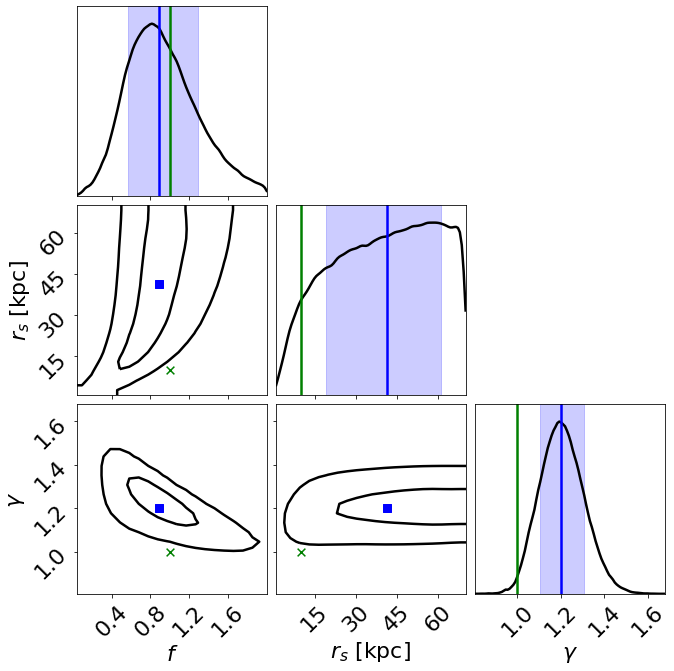

In [7]:
nBDs     = 1000 ; sigma= 0.1
f        = 1.; gamma    = 1.; rs = 10.

filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("like_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("posterior_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)

smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",)
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 0]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 2].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 0], 16), np.percentile(samples[:, 0], 84), color="blue", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="blue", alpha=0.2)
axes[2, 2].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="blue", alpha=0.2)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

#fig.savefig("1D2D_example.pdf", bbox_inches="tight")

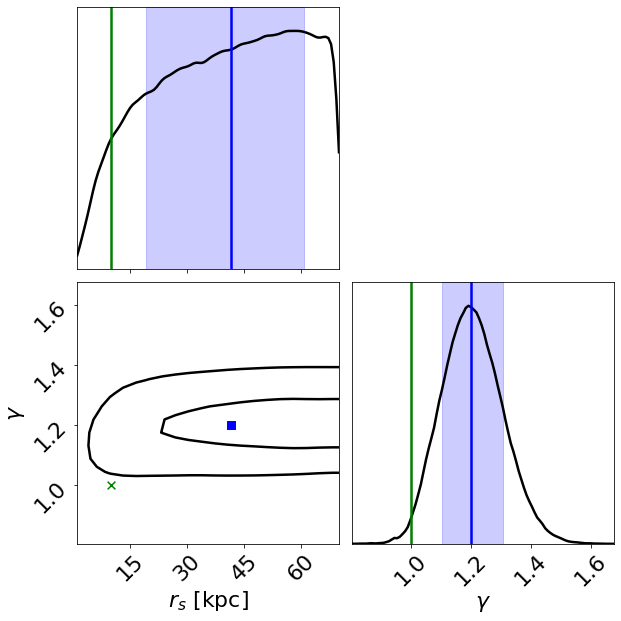

In [7]:
nBDs     = 1000 ; sigma= 0.1
f        = 1.; gamma    = 1.; rs = 10.

filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("like_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("posterior_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)

smooth=1.
fig, axes = corner(np.array([samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",)
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 3], np.array([samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(rs, color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(gamma, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(rs, gamma, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="blue", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="blue", alpha=0.2)

axes[1, 0].set_xlabel(r"$r_s$ [kpc]")
axes[1, 0].set_ylabel(r"$\gamma$")
axes[1, 1].set_xlabel(r"$\gamma$")

fig.savefig("1D2D_example_2.pdf", bbox_inches="tight")

0.7652579203745704 49.97227933276656    -16.834900651395856 1.0
0.9176143511932773 1.6853247960085027    -14.1785384969765 1.0
0.3232951225631391 1.999997353253955    -4.442941202979057 1.0


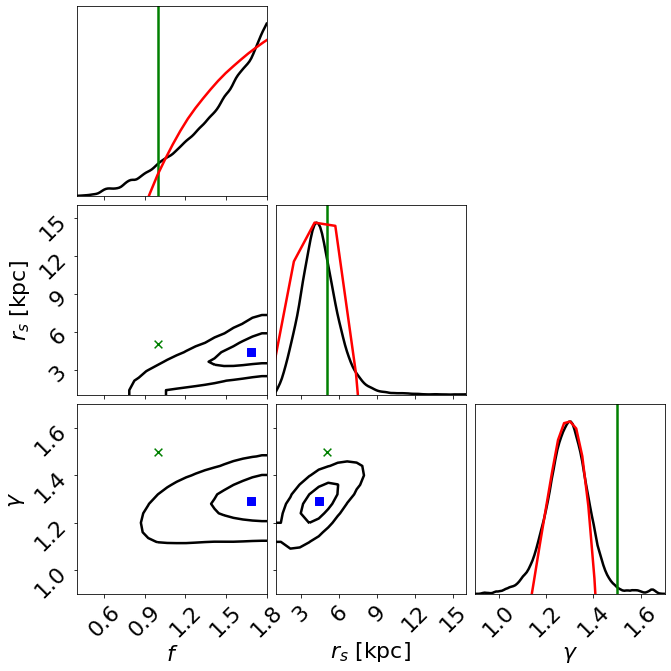

In [218]:
nBDs     = 1000 ; sigma= 0.1
f        = 1.; gamma = 1.5; rs = 5.

filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)

smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",
                   range=([0.4, 1.8], [1., 16.], [0.9, 1.7]))
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); #axes[0, 0].axvline(np.median(samples[:, 0]), color="k", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); #axes[1, 1].axvline(np.median(samples[:, 2]), color="k", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); #axes[2, 2].axvline(np.median(samples[:, 1]), color="k", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)


axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

bin_n=30
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)] - np.max(y[~np.isnan(y)]) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)] - np.max(y[~np.isnan(y)]) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)] - np.max(y[~np.isnan(y)]) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

1.1686548051028591 69.9966395322379    -0.8750708308378421 1.0
1.1515665840668485 1.9345008040760359    -9.990019321635089 1.0
0.3253683196278614 1.999999403784779    -3.2858454052501997 1.0


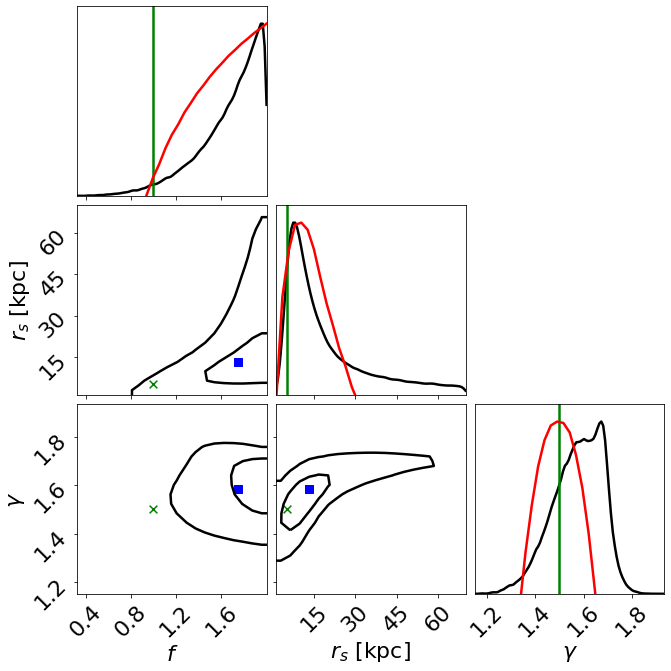

In [219]:
nBDs     = 1000 ; sigma= 0.2
f        = 1.; gamma = 1.5; rs = 5.

filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)

smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k")
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); #axes[0, 0].axvline(np.median(samples[:, 0]), color="k", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); #axes[1, 1].axvline(np.median(samples[:, 2]), color="k", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); #axes[2, 2].axvline(np.median(samples[:, 1]), color="k", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)


axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

bin_n=30
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)] - np.max(y[~np.isnan(y)]) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)] - np.max(y[~np.isnan(y)]) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)] - np.max(y[~np.isnan(y)]) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

1.2884743304327777 69.99979617033674    0.7207851076156544 1.0
1.3343454164914759 1.8229242054553314    -7.6538845133580935 1.0
0.2781050977189491 1.9999980521777738    -4.860931138397632 1.0


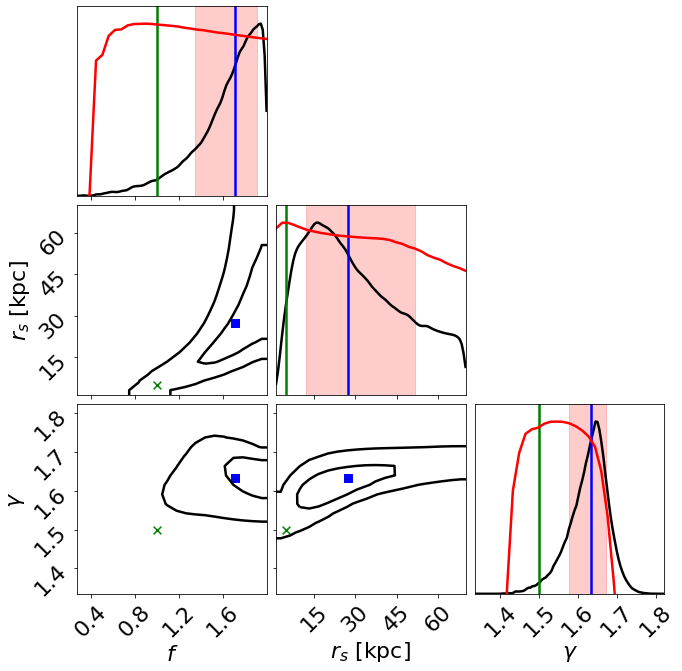

In [64]:
nBDs     = 1000 ; sigma= 0.1
f        = 1.; gamma = 1.5; rs = 5.

filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)

smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",)
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 0]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 2].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 0], 16), np.percentile(samples[:, 0], 84), color="red", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="red", alpha=0.2)
axes[2, 2].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="red", alpha=0.2)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

bin_n=30
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

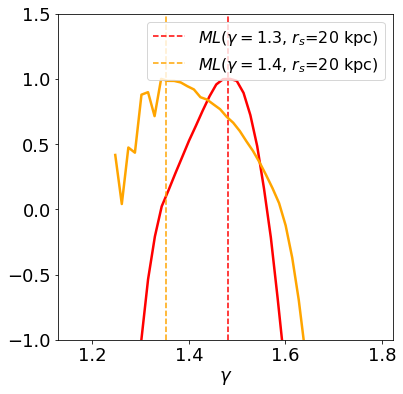

In [43]:
nBDs     = 1000; sigma= 0.1
f        = 1.; gamma = 1.3; rs = 5.
rank = 25

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
     
    
#axes.axvline(gamma, color="red", ls="-", lw=2.5, label=r"$\gamma=%.1f$, $r_s$=20 kpc" %gamma)
axes.set_xlabel(r"$\gamma$")


filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=40
x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
#print(x, y)
y = y - np.max(y[~np.isnan(y)]) + 1
#print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes.plot(x, y, ls="-", color="r", lw=2.5)
axes.axvline(samples[:, 1][np.argmax(like)], color="red", ls="--", label=r"$ML(\gamma=%.1f$, $r_s$=20 kpc)" %gamma)
#print(samples[:, 1][np.argmax(like)])


#kde   = gaussian_kde(samples.T[1])
#xvals = np.linspace(0., 2.8, 100)
#axes.plot(xvals, kde(xvals)/np.max(kde(xvals)), color="red", lw=2.5, ls=":")   

gamma=1.4
#axes.axvline(gamma, color="orange", ls="-", lw=2.5, label=r"$\gamma=%.1f$, $r_s$=20 kpc" %gamma)
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=40
x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
#print(x, y)
y = y - np.max(y[~np.isnan(y)]) + 1
#print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes.plot(x, y, ls="-", color="orange", lw=2.5)
axes.axvline(samples[:, 1][np.argmax(like)], color="orange", ls="--", label=r"$ML(\gamma=%.1f$, $r_s$=20 kpc)" %gamma)

#kde   = gaussian_kde(samples.T[1])
#xvals = np.linspace(0., 2.8, 100)
#axes.plot(xvals, kde(xvals)/np.max(kde(xvals)), color="orange", lw=2.5, ls=":")   

axes.set_ylim(-1, 1.5)
axes.legend(fontsize=16)

#fig.savefig("fixedT10v100_likelihood.png", bbox_inches="tight")

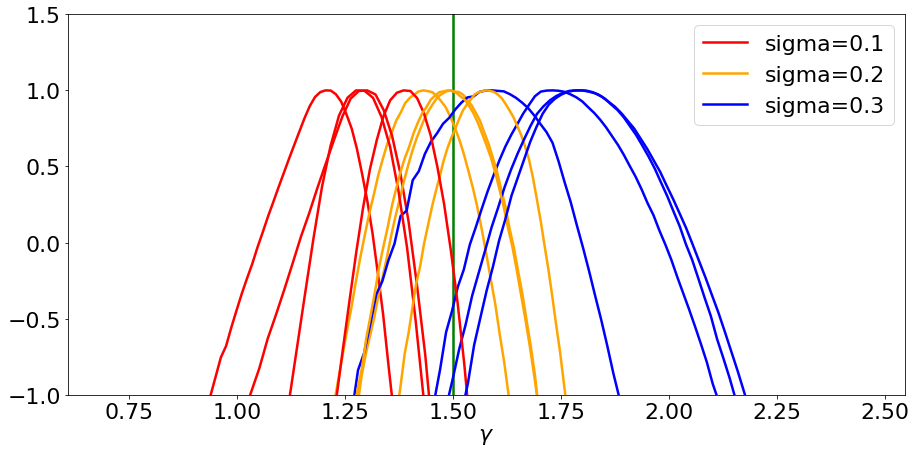

In [231]:
nBDs     = 1000; 
f        = 1.; gamma = 1.5; rs = 5.
rank= 97

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
     
axes.axvline(gamma, color="g", ls="-", lw=2.5)
axes.set_xlabel(r"$\gamma$")

sigma= 0.1
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=80
x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="r", lw=2.5, label="sigma=%.1f" %sigma)
#axes.axvline(samples[:, 1][np.argmax(like)], color="red", ls="--")

sigma=0.2
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
        %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=80
x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="orange", lw=2.5, label="sigma=%.1f" %sigma)
#axes.axvline(samples[:, 1][np.argmax(like)], color="orange", ls="--") 

sigma=0.3
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
        %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=80
x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="blue", lw=2.5, label="sigma=%.1f" %sigma)
#axes.axvline(samples[:, 1][np.argmax(like)], color="blue", ls="--") 


for rank in range(3):
    sigma= 0.1
    filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    like     = pickle.load(_file)
    filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    samples  = pickle.load(_file)
    bin_n=40
    x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes.plot(x, y, ls="-", color="r", lw=2.5)
    #axes.axvline(samples[:, 1][np.argmax(like)], color="red", ls="--")

    sigma=0.2
    filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
    _file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    like     = pickle.load(_file)
    filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    samples  = pickle.load(_file)
    bin_n=80
    x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes.plot(x, y, ls="-", color="orange", lw=2.5)
    #axes.axvline(samples[:, 1][np.argmax(like)], color="orange", ls="--") 
    
    sigma=0.3
    filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
    _file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    like     = pickle.load(_file)
    filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    samples  = pickle.load(_file)
    bin_n=80
    x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes.plot(x, y, ls="-", color="blue", lw=2.5)
    #axes.axvline(samples[:, 1][np.argmax(like)], color="blue", ls="--") 
    
axes.set_ylim(-1, 1.5)
axes.legend()
#axes.set_xlim([0.8, 1.5])
    
fig.savefig("fixedT10v100Tcut650_like_gamma_gamma%.1frs%.1f.pdf" %(gamma, rs), bbox_inches="tight")

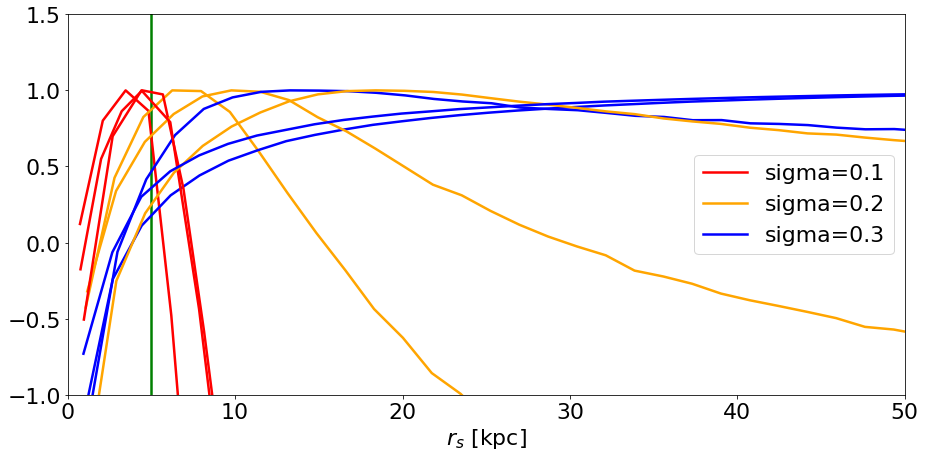

In [234]:
nBDs     = 1000; 
f        = 1.; gamma = 1.5; rs = 5.
rank= 97

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
     
axes.axvline(rs, color="g", ls="-", lw=2.5)
axes.set_xlabel(r"$r_s$ [kpc]")

sigma= 0.1
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=40
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="r", lw=2.5, label="sigma=%.1f" %sigma)
#axes.axvline(samples[:, 1][np.argmax(like)], color="red", ls="--")

sigma=0.2
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
        %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=40
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="orange", lw=2.5, label="sigma=%.1f" %sigma)
#axes.axvline(samples[:, 1][np.argmax(like)], color="orange", ls="--") 

sigma=0.3
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
        %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                            %(nBDs, sigma, gamma, rs, rank)), "rb") 
samples  = pickle.load(_file)
bin_n=40
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="blue", lw=2.5, label="sigma=%.1f" %sigma)
#axes.axvline(samples[:, 1][np.argmax(like)], color="blue", ls="--") 


for rank in range(2):
    sigma= 0.1
    filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    like     = pickle.load(_file)
    filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    samples  = pickle.load(_file)
    bin_n=40
    x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes.plot(x, y, ls="-", color="r", lw=2.5)
    #axes.axvline(samples[:, 1][np.argmax(like)], color="red", ls="--")

    sigma=0.2
    filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
    _file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    like     = pickle.load(_file)
    filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    samples  = pickle.load(_file)
    bin_n=40
    x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes.plot(x, y, ls="-", color="orange", lw=2.5)
    #axes.axvline(samples[:, 1][np.argmax(like)], color="orange", ls="--") 
    
    sigma=0.3
    filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
    _file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    like     = pickle.load(_file)
    filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
                %(nBDs, sigma))
    _file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i" 
                                %(nBDs, sigma, gamma, rs, rank+1)), "rb") 
    samples  = pickle.load(_file)
    bin_n=40
    x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes.plot(x, y, ls="-", color="blue", lw=2.5)
    #axes.axvline(samples[:, 1][np.argmax(like)], color="blue", ls="--") 
    
axes.set_ylim(-1, 1.5)
axes.legend()
axes.set_xlim([0., 50.])
    
fig.savefig("fixedT10v100Tcut650_like_rs_gamma%.1frs%.1f.pdf" %(gamma, rs), bbox_inches="tight")

In [209]:
def LI(L, samples, bin_n=80, verbose=False, _niteration=30):                                       
    """                                                                            
    For each parameter, construct profile likelihood and return the profile likelihood interval
    (i.e. region where the log Likelihood is within 1 of its maximum value)        
                                                                                   
    """                                                                            
    # Create bins in Likelihood vs parameter space, find the max Likelihood     
    # value in each bin and the corresponding parameter values                     
    x = binned_statistic(samples, -L, 'min', bins=bin_n)[1]                        
    y = binned_statistic(samples, -L, 'min', bins=bin_n+1)[0]   
                                                                                   
    # Create Interpolation fanction Likelihood - parameter                         
    #pdb.set_trace()                                                               
    z =  UnivariateSpline(x[~np.isnan(y)], y[~np.isnan(y)], s=0)                                               
                                                                                   
    # Find in which points crosses 1sigma horizontal line (where 1 sigma           
    # corresponds to 1/2 -for 1 dof-)                                              
    x_tmin     = np.min(samples)                                                   
    epsilon    = 1                                                                 
    niteration = 0                                                                 
    logLmin    = np.min(y[~np.isnan(y)]) + 0.5                                                   
    while epsilon > 10**-6 and niteration < _niteration:                                    
        niteration +=1                                                             
        minimum = minimize(lambda x: (z(x)-logLmin)**2, x_tmin,                    
                           bounds=((np.min(samples), samples[np.argmax(L)]),))  
        epsilon = minimum.fun                                                      
        x_tmin  = x_tmin*1.1                                                       
        _min    = minimum.x                                                        
                                                                                   
    if epsilon < 10**-6:                                                           
        LImin = _min[0]                                                            
    else:                                                                          
        LImin = np.min(samples)                                                    
                                                                                   
    x_tmax     = samples[np.argmax(L)]                                             
    epsilon    = 1                                                                 
    niteration = 0                                                                 
    while epsilon > 10**-6 and niteration < _niteration:                                    
        niteration +=1                                                             
        maximum = minimize(lambda x: (z(x)-logLmin)**2, x_tmax,                    
                           bounds=((samples[np.argmax(L)], np.max(samples)),))  
        epsilon  = maximum.fun                                                     
        x_tmax  = x_tmax*1.1                                                       
        _max    = maximum.x                                                        
                                                                                   
    if epsilon < 10**-6:                                                           
        LImax = _max[0]                                                            
    else:   
        print("here", epsilon, _max)
        LImax = np.max(samples)                                                    
                                                                                   
    if verbose==True:   
        print(LImin, LImax)
        fig, ax = plt.subplots(1, 1, figsize=(7, 7))                               
        ax.plot(x, y, color="k", lw=2.5)                                           
        ax.axvline(LImin, color="g"); ax.axvline(LImax, color="g")
        ax.set_ylim(np.min(y[~np.isnan(y)])-1, np.min(y[~np.isnan(y)]) + 1.1)
        ax.axhline(np.min(y[~np.isnan(y)]) + 1)
        ax.set_xlim(0, 0.25)
        #print(np.min(y[~np.isnan(y)]), x)
                                                                                   
    #Return                                                                        
    return  LImin, LImax

In [210]:
nBDs     = 1000; sigma= 0.3
f        = 1.; gamma = 1.1; rs = 10.

filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv43" %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma%.1f/" 
            %(nBDs, sigma))
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv43" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)

1.4370419863241057e-06 0.06280183589624456


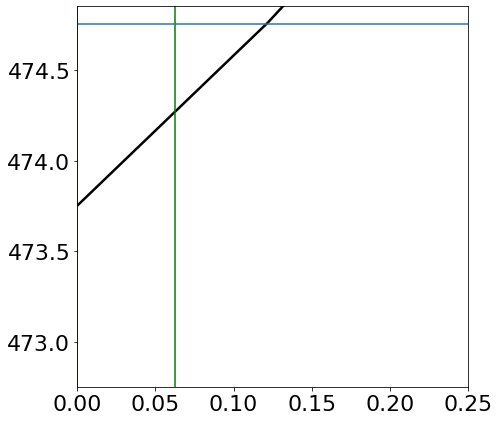

In [212]:
from scipy.interpolate import UnivariateSpline
from scipy.optimize import minimize
#LI(like, samples[:, 2], bin_n=20, verbose=True, niteration=30)

_, _ = LI(like, samples[:, 1], bin_n=20, verbose=True, _niteration=20)

#_, _ = LI(like, samples[:, 1], bin_n=80, verbose=True, _niteration=25)

In [11]:
path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT10Tcut650/"
ex   = "fixedT10v100Tcut650"
#path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT10Tcut650_nocutTwn/"
#ex   = "fixedT10v100Tcut650_nocutTwn"
#path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT10v100/"
#ex   = "fixedT10v100"
#path = "/home/mariacst/exoplanets/results/velocity/v30/fixedT10v30/"
#ex   = "fixedT10v30"
#path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT10v100reconstv30/"
#ex   = "fixedT10v100reconstv30"

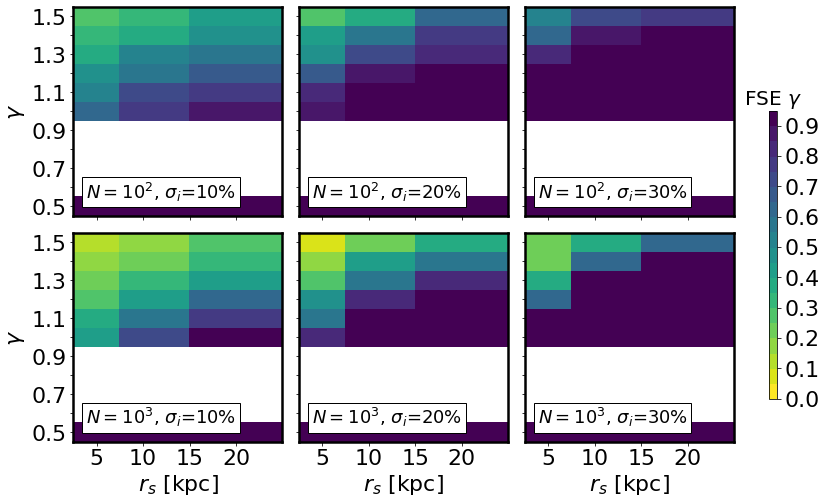

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

PE   = "ML"
im   = grid_FSE_all(path, 100, 0.1, ex, ax[0, 0], PE, False, True, True, False)
im   = grid_FSE_all(path, 1000, 0.1, ex, ax[1, 0], PE, False, True, True, True)
#im   = grid_FSE_all_1e5(path, 100000, 0.1, ex, ax[2, 0], PE, False, True, True, True)

im   = grid_FSE_all(path, 100, 0.2, ex, ax[0, 1], PE, False, True, False, False, show=False)
im   = grid_FSE_all(path, 1000, 0.2, ex, ax[1, 1], PE, False, True, False, True)
#im   = grid_FSE_all_1e5(path, 100000, 0.2, ex, ax[2, 1], PE, False, True, False, True)

im   = grid_FSE_all(path, 100, 0.3, ex, ax[0, 2], PE, False, True, False, False)
im   = grid_FSE_all(path, 1000, 0.3, ex, ax[1, 2], PE, False, True, False, True)
#im   = grid_FSE_all_1e5(path, 100000, 0.3, ex, ax[2, 2], PE, False, True, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $\gamma$", size=20.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

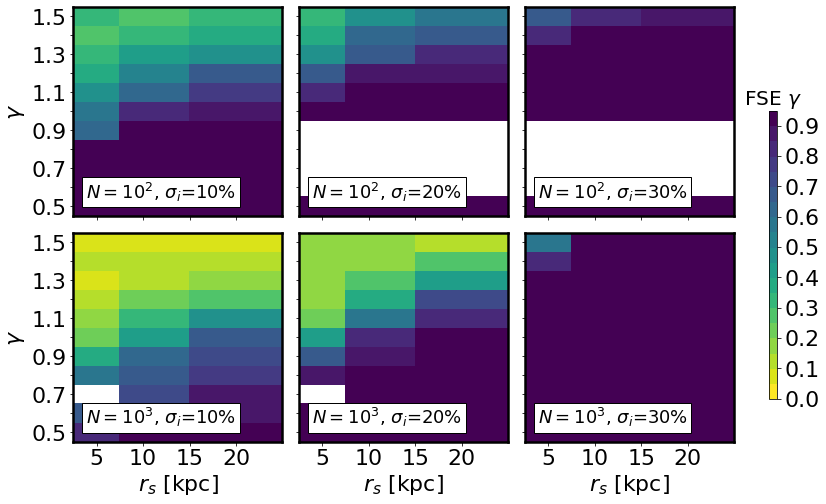

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

PE   = "ML"
im   = grid_FSE_all(path, 100, 0.1, ex, ax[0, 0], PE, False, True, True, False)
im   = grid_FSE_all(path, 1000, 0.1, ex, ax[1, 0], PE, False, True, True, True)
#im   = grid_FSE_all_1e5(path, 100000, 0.1, ex, ax[2, 0], PE, False, True, True, True)

im   = grid_FSE_all(path, 100, 0.2, ex, ax[0, 1], PE, False, True, False, False, show=False)
im   = grid_FSE_all(path, 1000, 0.2, ex, ax[1, 1], PE, False, True, False, True)
#im   = grid_FSE_all_1e5(path, 100000, 0.2, ex, ax[2, 1], PE, False, True, False, True)

im   = grid_FSE_all(path, 100, 0.3, ex, ax[0, 2], PE, False, True, False, False)
im   = grid_FSE_all(path, 1000, 0.3, ex, ax[1, 2], PE, False, True, False, True)
#im   = grid_FSE_all_1e5(path, 100000, 0.3, ex, ax[2, 2], PE, False, True, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $\gamma$", size=20.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

#fig.savefig(ex + "_FSE_" + PE + "_gamma.png", bbox_inches="tight")

../python/utils_plots_up.py:565: UserWarning: FixedFormatter should only be used together with FixedLocator
  '', '1.5'])
../python/utils_plots_up.py:570: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['5', '10', '15', '20'])


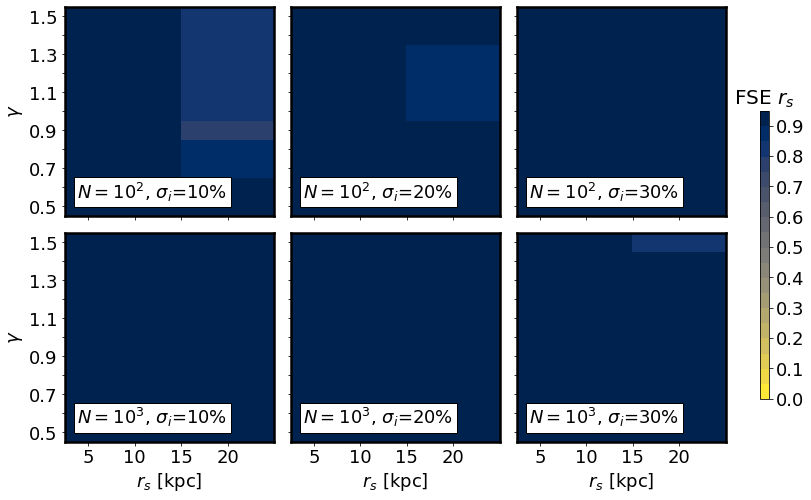

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

im   = grid_FSE_all(path, 100, 0.1, ex, ax[0, 0], PE, False, False, True, False)
im   = grid_FSE_all(path, 1000, 0.1, ex, ax[1, 0], PE, False, False, True, True, show=False)
#im   = grid_FSE_all_1e5(path, 100000, 0.1, "fixedT100K", ax[2, 0], PE, False, False, True, True)

im   = grid_FSE_all(path, 100, 0.2, ex, ax[0, 1], PE, False, False, False, False)
im   = grid_FSE_all(path, 1000, 0.2, ex, ax[1, 1], PE, False, False, False, True, show=False)
#im   = grid_FSE_all_1e5(path, 100000, 0.2, "fixedT100K", ax[2, 1], PE, False, False, False, True)

im   = grid_FSE_all(path, 100, 0.3, ex, ax[0, 2], PE, False, False, False, False)
im   = grid_FSE_all(path, 1000, 0.3, ex, ax[1, 2], PE, False, False, False, True)
#im   = grid_FSE_all_1e5(path, 100000, 0.3, "fixedT100K", ax[2, 2], PE, False, False, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $r_s$", size=20.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

fig.savefig(ex + "_FSE_" + PE + "_rs.pdf", bbox_inches="tight")

../python/utils_plots.py:554: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.5', '1', '', '1.2', '', '1.4', ''])
../python/utils_plots.py:559: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['5', '10', '20'])


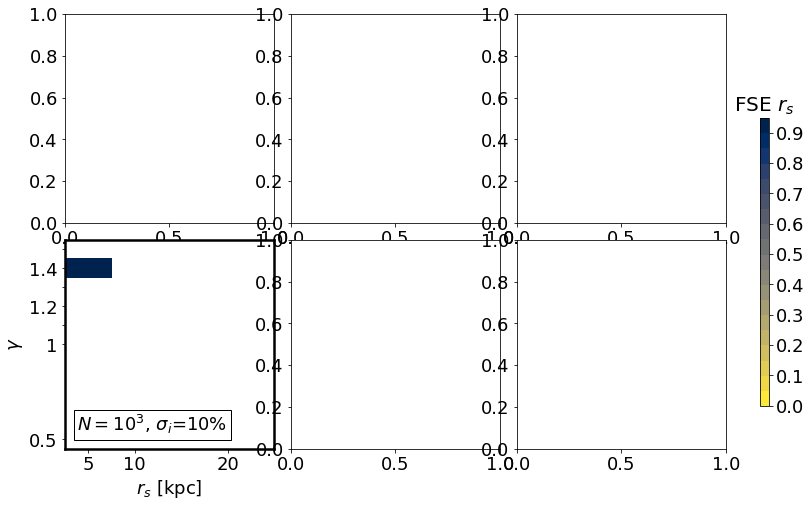

In [6]:
path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT10onlyMassive/"
ex   = "fixedT10v100onlyMassive"

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

PE   = "ML"
im   = grid_FSE_all(path, 1000, 0.1, ex, ax[1, 0], PE, False, False, True, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $r_s$", size=20.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

fig.savefig(ex + "_FSE_" + PE + "_rs.pdf", bbox_inches="tight")

**Coverage**

In [9]:
import utils_plots_up
import imp
imp.reload(utils_plots_up)
from utils_plots_up import coverage_all, grid_coverage_all

OSError: /home/mariacst/exoplanets/results/velocity/v100/fixedT10Tcut650/statistics_fixedT10v100Tcut650_N100_sigma0.2_f1.0gamma1.1rs20.0 not found.

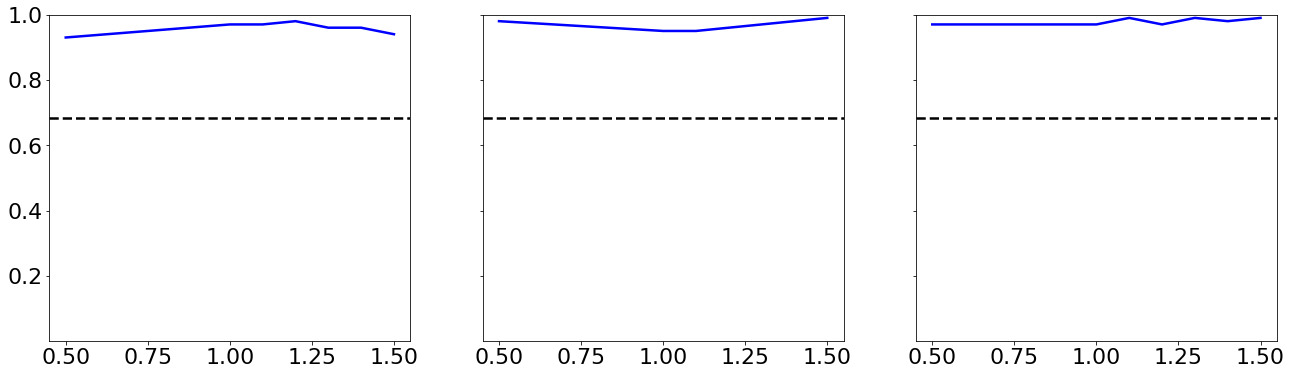

In [29]:
nBDs    = 100.
rel_unc = [0.1, 0.2, 0.3]
CR      = "symmetric"

color=["blue", "orange", "green"]

fig, ax = plt.subplots(1, 3, figsize=(22, 6), sharey=True)
ax[0].set_ylim(0.001, 1); ax[0].set_xlim(0.45, 1.55)
ax[1].set_xlim(0.45, 1.55); ax[2].set_xlim(0.45, 1.55)
ax[0].axhline(0.683, color="k", ls="--", lw=2.5); ax[1].axhline(0.683, color="k", ls="--", lw=2.5); ax[2].axhline(0.683, color="k", ls="--", lw=2.5)

x = [0.5, 1., 1.1, 1.2, 1.3, 1.4, 1.5]

i=0
for rel in rel_unc:
    cove1_rs5, cove2_rs5, cove3_rs5    = coverage_all(path, nBDs, rel, ex, 5., CR=CR)
    cove1_rs10, cove2_rs10, cove3_rs10 = coverage_all(path, nBDs, rel, ex, 10., CR=CR)
    cove1_rs20, cove2_rs20, cove3_rs20 = coverage_all(path, nBDs, rel, ex, 20., CR=CR)
    
    ax[0].plot(x, np.asarray(cove1_rs5)/100., color=color[i], lw=2.5)
    ax[1].plot(x, np.asarray(cove1_rs10)/100., color=color[i], lw=2.5)
    ax[2].plot(x, np.asarray(cove1_rs20)/100., color=color[i], lw=2.5, 
               label=("nBDs=%i, $\sigma=%.1f$" %(nBDs, rel)))
    i+=1
    
ax[0].set_ylim(0.001, 1); ax[0].set_xlim(0.45, 1.55)
ax[1].set_xlim(0.45, 1.55); ax[2].set_xlim(0.45, 1.55)
ax[0].axhline(0.683, color="k", ls="--", lw=2.5); ax[1].axhline(0.683, color="k", ls="--", lw=2.5); ax[2].axhline(0.683, color="k", ls="--", lw=2.5)

nBDs=1000
i=0
for rel in rel_unc:
    cove1_rs5, cove2_rs5, cove3_rs5    = coverage_all(path, nBDs, rel, ex, 5., CR=CR)
    cove1_rs10, cove2_rs10, cove3_rs10 = coverage_all(path, nBDs, rel, ex, 10., CR=CR)
    cove1_rs20, cove2_rs20, cove3_rs20 = coverage_all(path, nBDs, rel, ex, 20., CR=CR)
    
    ax[0].plot(x, np.asarray(cove1_rs5)/100., color=color[i], lw=2.5, ls="--")
    ax[1].plot(x, np.asarray(cove1_rs10)/100., color=color[i], lw=2.5, ls="--")
    ax[2].plot(x, np.asarray(cove1_rs20)/100., color=color[i], lw=2.5, ls="--")
    i+=1

ax[2].legend(frameon=False)
ax[0].set_ylabel("Coverage")

plt.subplots_adjust(wspace=0.04)

In [10]:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':18})

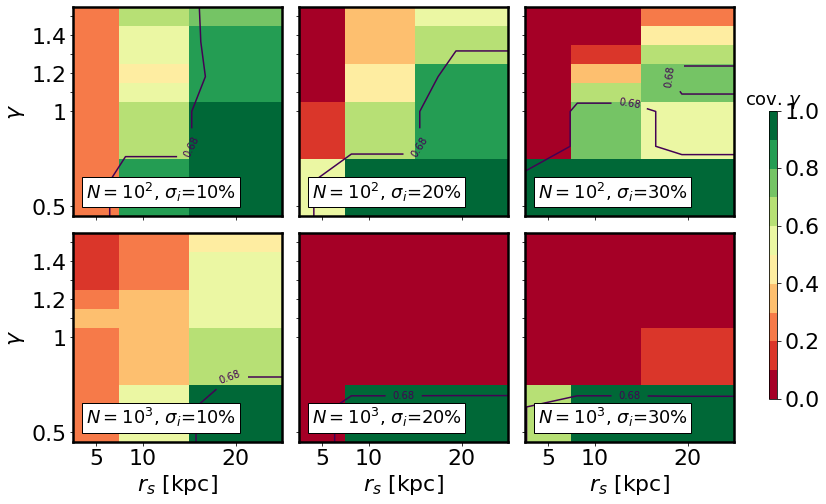

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

CR   = "symmetric"
im   = grid_coverage_all(path, 100, 0.1, ex, ax[0, 0], CR, False, True, True, False)
im   = grid_coverage_all(path, 1000, 0.1, ex, ax[1, 0], CR, False, True, True, True)
#im   = grid_coverage_all_1e5(path, 100000, 0.1, "fixedT100K", ax[2, 0], CR, False, True, True, True)

im   = grid_coverage_all(path, 100, 0.2, ex, ax[0, 1], CR, False, True, False, False)
im   = grid_coverage_all(path, 1000, 0.2, ex, ax[1, 1], CR, False, True, False, True)
#im   = grid_coverage_all_1e5(path, 100000, 0.2, "fixedT100K", ax[2, 1], CR, False, True, False, True)

im   = grid_coverage_all(path, 100, 0.3, ex, ax[0, 2], CR, False, True, False, False)
im   = grid_coverage_all(path, 1000, 0.3, ex, ax[1, 2],CR, False, True, False, True)
#im   = grid_coverage_all_1e5(path, 100000, 0.3, "fixedT100K", ax[2, 2], CR, False, True, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"cov. $\gamma$", size=18.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

fig.savefig(ex + "_coverage_" + CR + "_gamma.png", bbox_inches="tight")

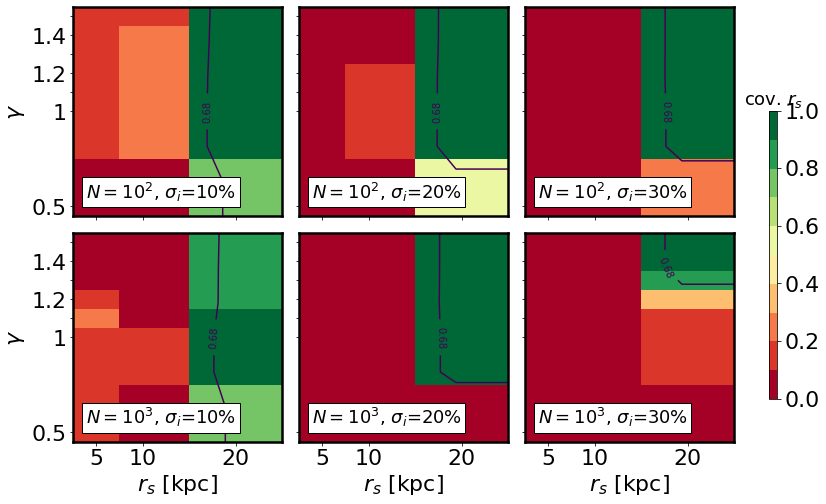

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

im   = grid_coverage_all(path, 100, 0.1, ex, ax[0, 0], CR, False, False, True, False)
im   = grid_coverage_all(path, 1000, 0.1, ex, ax[1, 0], CR, False, False, True, True)
#im   = grid_coverage_all_1e5(path, 100000, 0.1, "fixedT100K", ax[2, 0], CR, False, True, True, True)

im   = grid_coverage_all(path, 100, 0.2, ex, ax[0, 1], CR, False, False, False, False)
im   = grid_coverage_all(path, 1000, 0.2, ex, ax[1, 1], CR, False, False, False, True)
#im   = grid_coverage_all_1e5(path, 100000, 0.2, "fixedT100K", ax[2, 1], CR, False, True, False, True)

im   = grid_coverage_all(path, 100, 0.3, ex, ax[0, 2], CR, False, False, False, False)
im   = grid_coverage_all(path, 1000, 0.3, ex, ax[1, 2],CR, False, False, False, True)
#im   = grid_coverage_all_1e5(path, 100000, 0.3, "fixedT100K", ax[2, 2], CR, False, True, False, True)


fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"cov. $r_s$", size=18.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

fig.savefig(ex + "_coverage_" + CR + "_rs.png", bbox_inches="tight")

## Fixed velocity DM particles to $v=100$ km/s & $\sigma_T=100$ K

../python/utils_plots.py:612: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.5', '1', '', '1.2', '', '1.4', ''])
../python/utils_plots.py:617: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['5', '10', '20'])


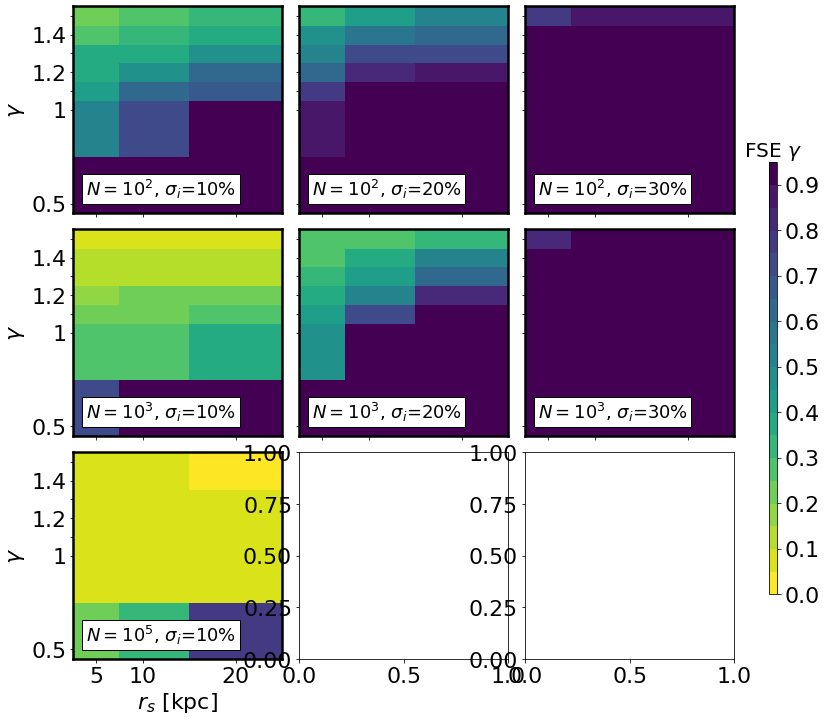

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT100K/"
PE   = "ML"
ex   = "fixedT100K_nwalkers100"
im   = grid_FSE_all(path, 100, 0.1, ex, ax[0, 0], PE, False, True, True, False)
im   = grid_FSE_all(path, 1000, 0.1, ex, ax[1, 0], PE, False, True, True, False)
im   = grid_FSE_all_1e5(path, 100000, 0.1, "fixedT100K", ax[2, 0], PE, False, True, True, True, trick=False)

im   = grid_FSE_all(path, 100, 0.2, ex, ax[0, 1], PE, False, True, False, False)
im   = grid_FSE_all(path, 1000, 0.2, ex, ax[1, 1], PE, False, True, False, False)
#im   = grid_FSE_all_1e5(path, 100000, 0.2, "fixedT100K", ax[2, 1], PE, False, True, False, True)

im   = grid_FSE_all(path, 100, 0.3, ex, ax[0, 2], PE, False, True, False, False)
im   = grid_FSE_all(path, 1000, 0.3, ex, ax[1, 2], PE, False, True, False, False)
#im   = grid_FSE_all_1e5(path, 100000, 0.3, "fixedT100K", ax[2, 2], PE, False, True, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $\gamma$", size=20.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

#fig.savefig("fixedT100K_nwalkers100_FSE_" + PE + "_gamma.pdf", bbox_inches="tight")

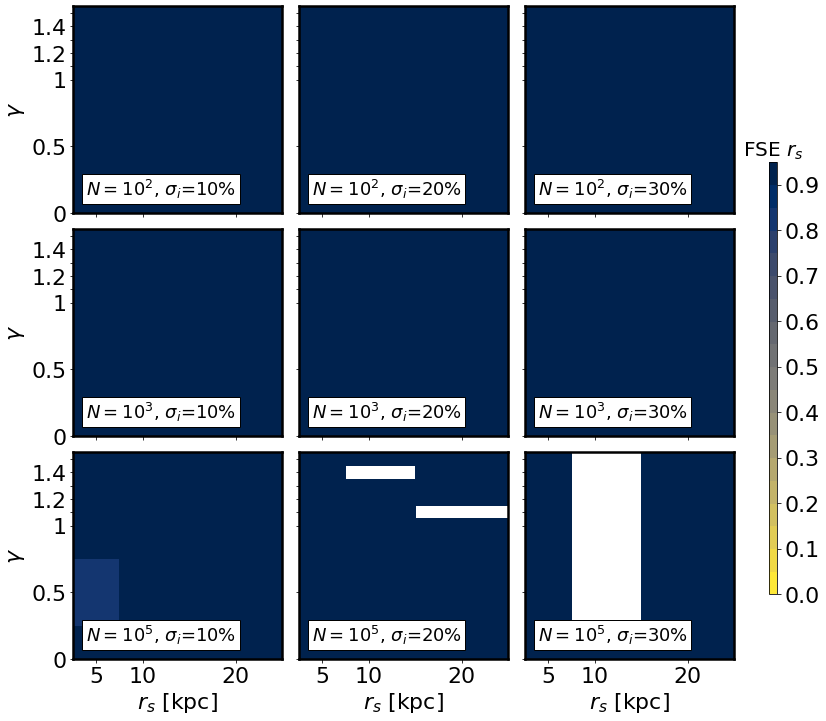

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT100K/"
PE   = "ML"
ex   = "fixedT100K_nwalkers100"
im   = grid_FSE_all(path, 100, 0.1, ex, ax[0, 0], PE, False, False, True, False)
im   = grid_FSE_all(path, 1000, 0.1, ex, ax[1, 0], PE, False, False, True, False)
im   = grid_FSE_all_1e5(path, 100000, 0.1, "fixedT100K", ax[2, 0], PE, False, False, True, True)

im   = grid_FSE_all(path, 100, 0.2, ex, ax[0, 1], PE, False, False, False, False)
im   = grid_FSE_all(path, 1000, 0.2, ex, ax[1, 1], PE, False, False, False, False)
im   = grid_FSE_all_1e5(path, 100000, 0.2, "fixedT100K", ax[2, 1], PE, False, False, False, True)

im   = grid_FSE_all(path, 100, 0.3, ex, ax[0, 2], PE, False, False, False, False)
im   = grid_FSE_all(path, 1000, 0.3, ex, ax[1, 2], PE, False, False, False, False)
im   = grid_FSE_all_1e5(path, 100000, 0.3, "fixedT100K", ax[2, 2], PE, False, False, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $r_s$", size=20.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

#fig.savefig("fixedT100K_nwalkers100_FSE_" + PE + "_rs.pdf", bbox_inches="tight")

In [6]:
import imp
import utils_plots
imp.reload(utils_plots)
from utils_plots import grid_coverage_all_1e5

../python/utils_plots.py:1028: UserWarning: The following kwargs were not used by contour: 'color'
  CS = ax.contour(xi_c, yi_c, zi_c.reshape(5, 5), levels=[68, 100], color="k")
../python/utils_plots.py:1043: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.5', '1', '', '1.2', '', '1.4', ''])
../python/utils_plots.py:1114: UserWarning: The following kwargs were not used by contour: 'color'
  CS = ax.contour(xi_c, yi_c, zi_c.reshape(5, 5), levels=[68, 100], color="k")
../python/utils_plots.py:1129: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.5', '1', '', '1.2', '', '1.4', ''])
../python/utils_plots.py:1134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['5', '10', '20'])
../python/utils_plots.py:1114: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(xi_c, yi_c, zi_c.reshape(5, 5), levels=[

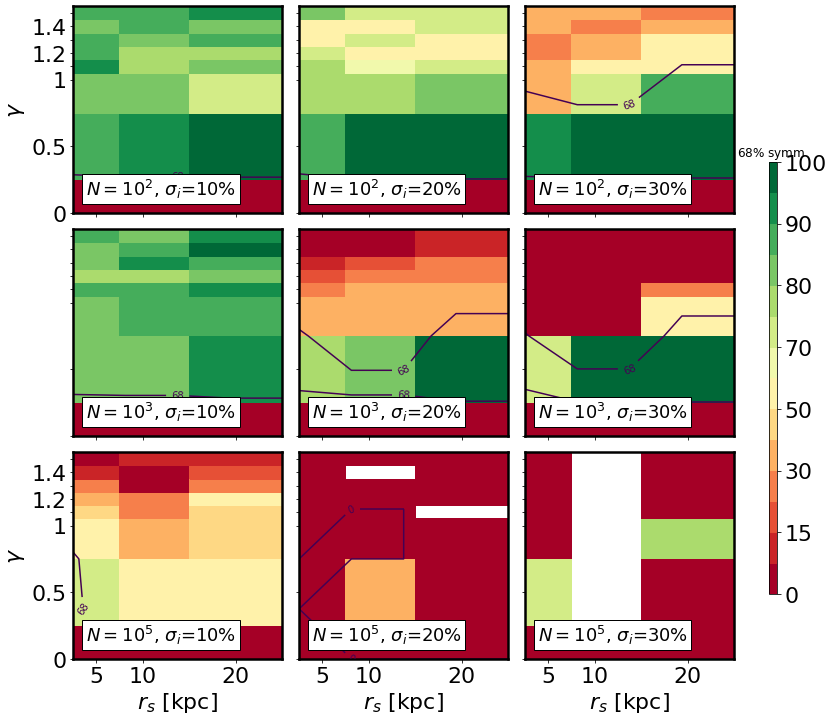

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT100K/"
CR   = "LI"
ex   = "fixedT100K_nwalkers100"
im   = grid_coverage_all(path, 100, 0.1, ex, ax[0, 0], CR, False, True, True, False)
im   = grid_coverage_all(path, 1000, 0.1, ex, ax[1, 0], CR, False, True, False, False)
im   = grid_coverage_all_1e5(path, 100000, 0.1, "fixedT100K", ax[2, 0], CR, False, True, True, True)

im   = grid_coverage_all(path, 100, 0.2, ex, ax[0, 1], CR, False, True, False, False)
im   = grid_coverage_all(path, 1000, 0.2, ex, ax[1, 1], CR, False, True, False, False)
im   = grid_coverage_all_1e5(path, 100000, 0.2, "fixedT100K", ax[2, 1], CR, False, True, False, True)

im   = grid_coverage_all(path, 100, 0.3, ex, ax[0, 2], CR, False, True, False, False)
im   = grid_coverage_all(path, 1000, 0.3, ex, ax[1, 2],CR, False, True, False, False)
im   = grid_coverage_all_1e5(path, 100000, 0.3, "fixedT100K", ax[2, 2], CR, False, True, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"68$\%$ symm.", size=12.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

#fig.savefig("fixedT100K_nwalkers100_coverage_" + CR + "_gamma.pdf", bbox_inches="tight")

../python/utils_plots.py:1039: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(xi_c, yi_c, zi_c.reshape(5, 5), levels=[68, 100], color="k")
../python/utils_plots.py:1039: UserWarning: The following kwargs were not used by contour: 'color'
  CS = ax.contour(xi_c, yi_c, zi_c.reshape(5, 5), levels=[68, 100], color="k")
../python/utils_plots.py:1125: UserWarning: The following kwargs were not used by contour: 'color'
  CS = ax.contour(xi_c, yi_c, zi_c.reshape(5, 5), levels=[68, 100], color="k")
../python/utils_plots.py:1125: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(xi_c, yi_c, zi_c.reshape(5, 5), levels=[68, 100], color="k")


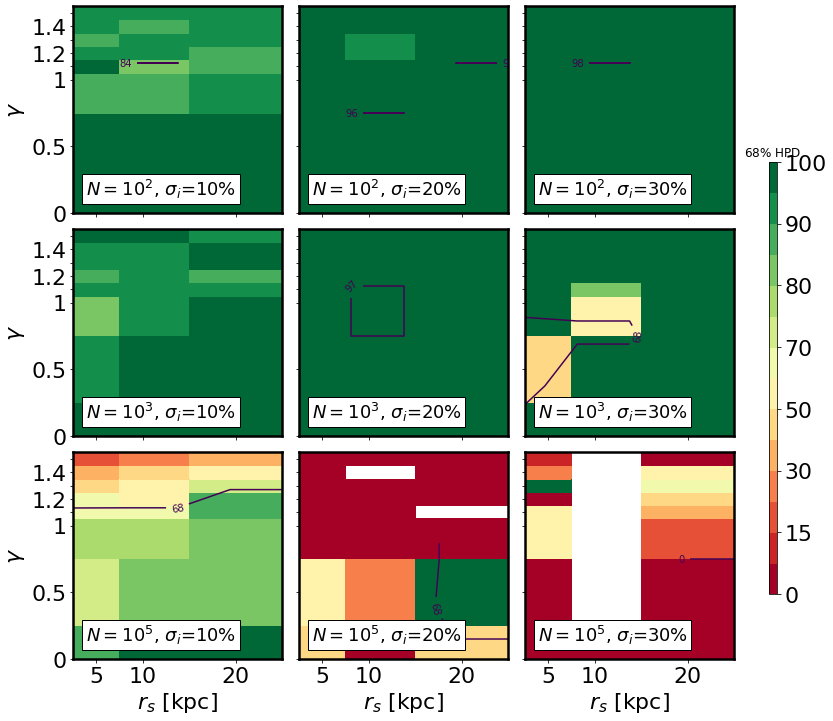

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT100K/"
CR   = "LI"
ex   = "fixedT100K_nwalkers100"
im   = grid_coverage_all(path, 100, 0.1, ex, ax[0, 0], CR, False, False, True, False)
im   = grid_coverage_all(path, 1000, 0.1, ex, ax[1, 0],CR, False, False, True, False)
im   = grid_coverage_all_1e5(path, 100000, 0.1, "fixedT100K", ax[2, 0], CR, False, False, True, True)

im   = grid_coverage_all(path, 100, 0.2, ex, ax[0, 1], CR, False, False, False, False)
im   = grid_coverage_all(path, 1000, 0.2, ex, ax[1, 1],CR, False, False, False, False)
im   = grid_coverage_all_1e5(path, 100000, 0.2, "fixedT100K", ax[2, 1], CR, False, False, False, True)

im   = grid_coverage_all(path, 100, 0.3, ex, ax[0, 2], CR, False, False, False, False)
im   = grid_coverage_all(path, 1000, 0.3, ex, ax[1, 2],CR, False, False, False, False)
im   = grid_coverage_all_1e5(path, 100000, 0.3, "fixedT100K", ax[2, 2], CR, False, False, False, True)

fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.93, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"68$\%$ HPD", size=12.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

#fig.savefig("fixedT100K_coverage_" + CR + "_rs.pdf", bbox_inches="tight")

## RC priors

In [58]:
import imp
import utils_plots
imp.reload(utils_plots)
from utils_plots import grid_FSE_all, grid_FSE_all_1e5, coverage_all

rc('font',**{'family':'serif','serif':['Palatino'], 'size':18})

In [59]:
path = "/home/mariacst/exoplanets/running/priorsRC/"
ex   = "priorsRC"

/home/mariacst/exoplanets/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract


19.999687852055082 20.00023055766745    nan nan


/home/mariacst/exoplanets/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in subtract


0.8997306708136137 0.9004342219401479    nan nan
0.8997282506199182 0.9002365050863501    nan nan


/home/mariacst/exoplanets/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in subtract


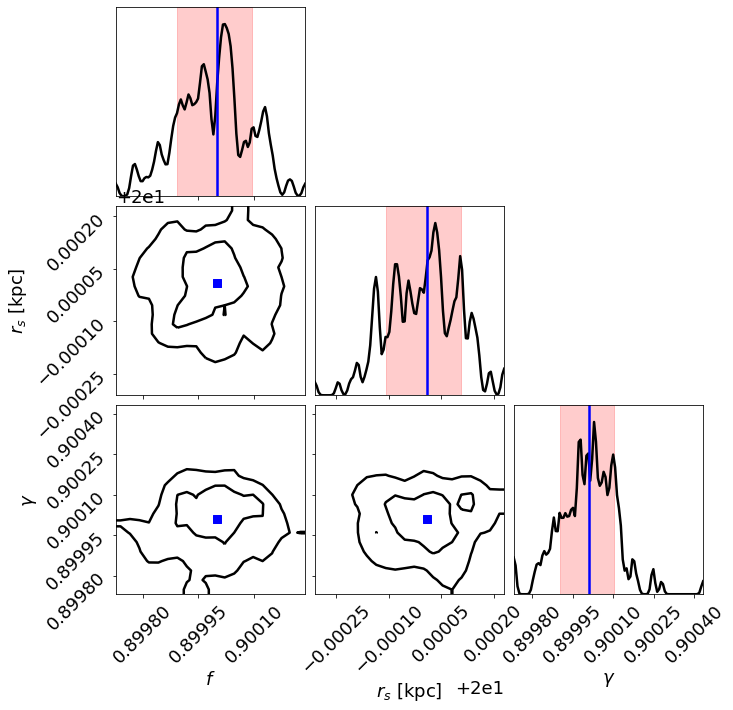

In [60]:
nBDs     = 100 ; sigma= 0.1
f        = 1.; gamma    = 1.; rs = 10.

_file    = open(path + ("like_priorsRC_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
_file    = open(path + ("posterior_priorsRC_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv1" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)

smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k",)
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[0, 0].axvline(np.median(samples[:, 0]), color="b", ls="-", lw=2.5)
axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); axes[1, 1].axvline(np.median(samples[:, 2]), color="b", ls="-", lw=2.5)
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 2].axvline(np.median(samples[:, 1]), color="b", ls="-", lw=2.5)
axes[1, 0].scatter(f, rs, marker="x", color="g", s=60); axes[1, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 2]), marker="s", color="b", s=60)
axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); axes[2, 0].scatter(np.median(samples[:, 0]), np.median(samples[:, 1]), marker="s", color="b", s=60)
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); axes[2, 1].scatter(np.median(samples[:, 2]), np.median(samples[:, 1]), marker="s", color="b", s=60)

axes[0, 0].axvspan(np.percentile(samples[:, 0], 16), np.percentile(samples[:, 0], 84), color="red", alpha=0.2)
axes[1, 1].axvspan(np.percentile(samples[:, 2], 16), np.percentile(samples[:, 2], 84), color="red", alpha=0.2)
axes[2, 2].axvspan(np.percentile(samples[:, 1], 16), np.percentile(samples[:, 1], 84), color="red", alpha=0.2)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")

bin_n=8
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

4.363106900899193


(0.0, 50.0)

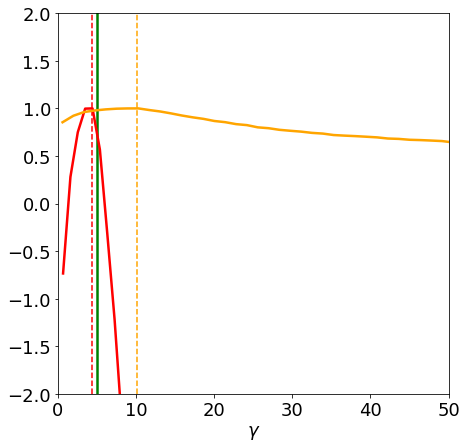

In [57]:
nBDs     = 1000; sigma= 0.1
f        = 1.; gamma = 1.3; rs = 5.

fig, axes = plt.subplots(1, 1, figsize=(7, 7))
     
    
axes.axvline(rs, color="g", ls="-", lw=2.5)
axes.set_xlabel(r"$\gamma$")


filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv13" %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv13" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)
bin_n=50
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
#print(x, y)
y = y - np.max(y[~np.isnan(y)]) + 1
#print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes.plot(x, y, ls="-", color="r", lw=2.5)
axes.axvline(samples[:, 2][np.argmax(like)], color="red", ls="--")
print(samples[:, 2][np.argmax(like)])


#kde   = gaussian_kde(samples.T[1])
#xvals = np.linspace(0., 2.8, 100)
#axes.plot(xvals, kde(xvals)/np.max(kde(xvals)), color="red", lw=2.5, ls=":")   

nBDs=100
filepath = ("/hdfs/local/mariacst/exoplanets/results/likelihood/velocity/v100/fixedT10Tcut650/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("like_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv13" %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)
filepath = ("/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/fixedT10Tcut650/N%isigma0.1/" %nBDs)
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv13" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)
bin_n=50
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
#print(x, y)
y = y - np.max(y[~np.isnan(y)]) + 1
#print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes.plot(x, y, ls="-", color="orange", lw=2.5)
axes.axvline(samples[:, 2][np.argmax(like)], color="orange", ls="--")

#kde   = gaussian_kde(samples.T[1])
#xvals = np.linspace(0., 2.8, 100)
#axes.plot(xvals, kde(xvals)/np.max(kde(xvals)), color="orange", lw=2.5, ls=":")   

axes.set_ylim(-2, 2)
axes.set_xlim(0., 50)

### Reconstruction properties for different point estimates

In [31]:
imp.reload(utils_plots)
from utils_plots import FSE_f_gamma_rs, MSE_f_gamma_rs

rc('font',**{'family':'serif','serif':['Palatino'], 'size':18})

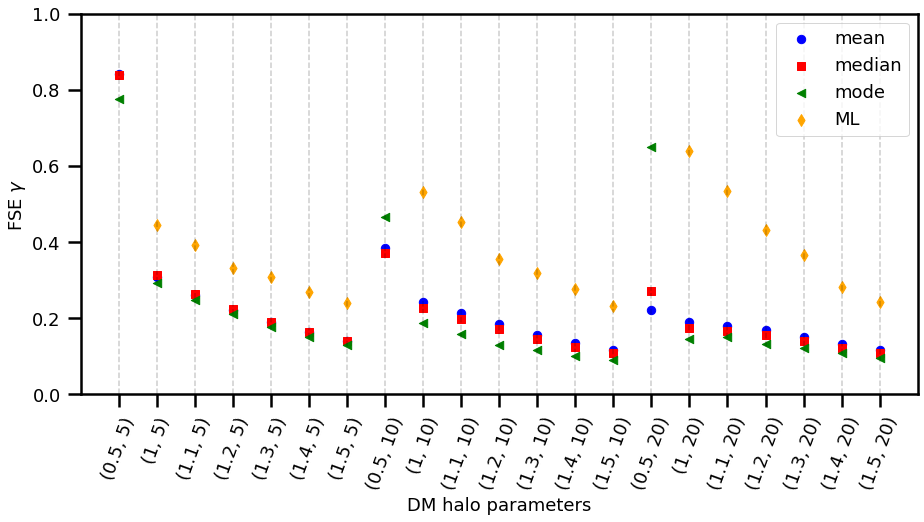

In [32]:
path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT10v100/"
ex   = "fixedT10v100"
nBDs = 100
sigma = 0.1

gamma = [0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
rs    = [5, 10, 20]
x     = np.linspace(0, 1, 21)

PE     = ["mean", "median", "mode", "ML"]
color  = ["blue", "red", "green", "orange"]
marker = ["o", "s", "<", "d"]

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
i = 0
for pe in PE:
    xi, yi, _, zi_2, _ = FSE_f_gamma_rs(path, nBDs, sigma, ex, rank=100, PE=pe)
    
    ax.scatter(x, np.ravel(zi_2), color=color[i], marker=marker[i], label=pe, s=70.)
    i+=1
    
for i in x:
    ax.axvline(i, ls="--", alpha=0.2, color="k")

ax.legend()
ax.set_xticks(x)    
ax.set_xticklabels(['(0.5, 5)', '(1, 5)', '(1.1, 5)', '(1.2, 5)', '(1.3, 5)', 
                    '(1.4, 5)', '(1.5, 5)', '(0.5, 10)', '(1, 10)', '(1.1, 10)', '(1.2, 10)', 
                    '(1.3, 10)', '(1.4, 10)', '(1.5, 10)', '(0.5, 20)', '(1, 20)', '(1.1, 20)', 
                    '(1.2, 20)', '(1.3, 20)', '(1.4, 20)', '(1.5, 20)'], 
                   rotation=70);

ax.set_ylim(0, 1.)
ax.set_ylabel(r"FSE $\gamma$"); ax.set_xlabel("DM halo parameters")

for axis in ['top','bottom','left','right']:                                    
    ax.spines[axis].set_linewidth(2.5) 
ax.tick_params(which='major',direction="out",width=2.5,length=13,right=False,top=False,pad=7)
fig.savefig(ex + "_FSE_gamma.png", bbox_inches="tight")

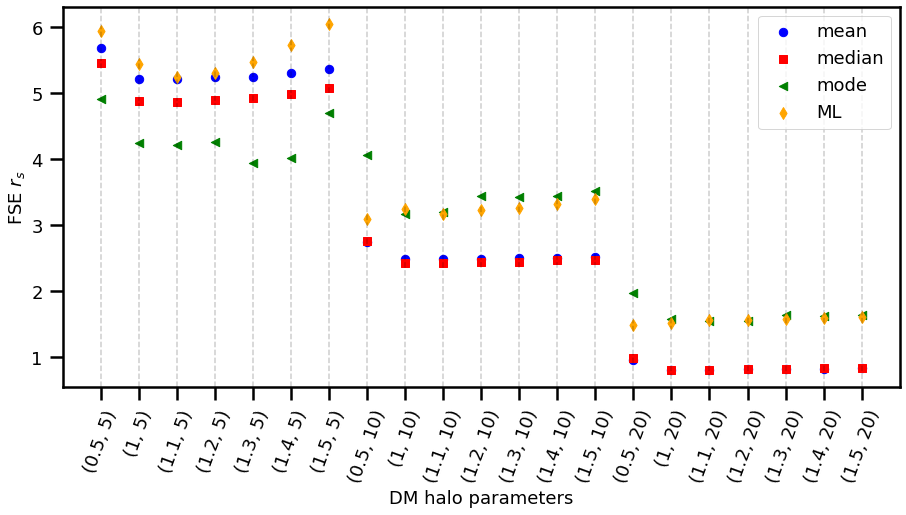

In [87]:
path = "/home/mariacst/exoplanets/results/velocity/v100/fixedT10v100/"
ex   = "fixedT10v100"
nBDs = 100
sigma = 0.1

gamma = [0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
rs    = [5, 10, 20]
x     = np.linspace(0, 1, 21)

PE     = ["mean", "median", "mode", "ML"]
color  = ["blue", "red", "green", "orange"]
marker = ["o", "s", "<", "d"]

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
i = 0
for pe in PE:
    xi, yi, _, _, zi_3 = FSE_f_gamma_rs(path, nBDs, sigma, ex, rank=100, PE=pe)
    
    ax.scatter(x, np.ravel(zi_3), color=color[i], marker=marker[i], label=pe, s=70.)
    i+=1
    
for i in x:
    ax.axvline(i, ls="--", alpha=0.2, color="k")

ax.legend()
ax.set_xticks(x)    
ax.set_xticklabels(['(0.5, 5)', '(1, 5)', '(1.1, 5)', '(1.2, 5)', '(1.3, 5)', 
                    '(1.4, 5)', '(1.5, 5)', '(0.5, 10)', '(1, 10)', '(1.1, 10)', '(1.2, 10)', 
                    '(1.3, 10)', '(1.4, 10)', '(1.5, 10)', '(0.5, 20)', '(1, 20)', '(1.1, 20)', 
                    '(1.2, 20)', '(1.3, 20)', '(1.4, 20)', '(1.5, 20)'], 
                   rotation=70);

#ax.set_ylim(0, 1.)
ax.set_ylabel(r"FSE $r_s$"); ax.set_xlabel("DM halo parameters")

for axis in ['top','bottom','left','right']:                                    
    ax.spines[axis].set_linewidth(2.5) 
ax.tick_params(which='major',direction="out",width=2.5,length=13,right=False,top=False,pad=7)
fig.savefig(ex + "_FSE_rs.pdf", bbox_inches="tight")

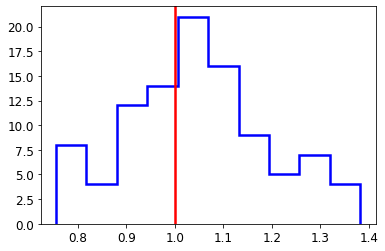

In [53]:
data = np.genfromtxt(path + "statistics_ex1_N100_sigma0.1_f1.0gamma%.1frs%.1f" %(1, 20), unpack=True)

pe = data[1]

fig, ax = plt.subplots()

ax.hist(pe, histtype="step", color="blue", lw=2.5);
ax.axvline(1., color="red", lw=2.5)

## HPD w/ pymc3 statistics

I get an error when running in terminal!

In [78]:
from pymc3.stats import hpd

In [96]:
filepath = "/hdfs/local/mariacst/exoplanets/results/posterior/velocity/v100/"
nBDs=100; rel_unc=0.1; f=1.; gamma=1.5; rs=20.

hpd_1sigma = []

for i in range(100):
    file_name  = (filepath + ("N%isigma%.1f/posterior_" %(nBDs, rel_unc))   
                 + ex +                                                        
                 ("_N%i_sigma%.1f_f%.1fgamma%.1frs%.1fv%i"                     
                 %(nBDs, rel_unc, f, gamma, rs, i+1)))                         
    samples    = pickle.load(open(file_name, "rb")) 
    hpd_1sigma.append(hpd(samples, alpha=0.32))
    
hpd_1sigma = np.array(hpd_1sigma)
print(hpd_1sigma.shape)

(100, 3, 2)


In [102]:
rank=99
print(hpd_1sigma[rank])
print(hpd_1sigma[rank][2, 1])

[[ 0.14358159  0.9648952 ]
 [ 1.42184592  1.81377713]
 [23.7474298  66.63239129]]
66.63239128846016


In [86]:
print(hpd_1sigma.shape)

(3, 100)


In [91]:
D=3;rank=100
hpd_1sigma = np.zeros((D, rank))
print(hpd(samples, alpha=0.32))
print(hpd(samples, alpha=0.32).shape)


array([[ 0.14358159,  0.9648952 ],
       [ 1.42184592,  1.81377713],
       [23.7474298 , 66.63239129]])